# 1. Data overview

Let's form the first insight from bank client data

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
from IPython.display import display

Load source of data (csv file)

In [2]:
data = pd.read_csv('data.csv')

Print 10 random rows of the table to get an overview of its structure

In [3]:
data.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16050,0,-2390.792857,30,высшее,0,женат / замужем,0,F,сотрудник,0,133902.542711,покупка своего жилья
822,0,-180.875365,23,неоконченное высшее,2,женат / замужем,0,F,сотрудник,0,59323.507625,покупка коммерческой недвижимости
9834,0,-3504.024879,41,Среднее,1,женат / замужем,0,M,сотрудник,0,117209.073551,покупка коммерческой недвижимости
11179,2,-4277.229432,47,среднее,1,в разводе,3,F,госслужащий,0,217431.653642,получение образования
15449,0,389597.222031,54,среднее,1,женат / замужем,0,F,пенсионер,0,89488.624416,покупка своего жилья
18018,3,-1832.697440,37,среднее,1,Не женат / не замужем,4,F,компаньон,0,109599.120408,на покупку подержанного автомобиля
20743,0,-993.995430,52,среднее,1,женат / замужем,0,M,сотрудник,0,135867.145917,свой автомобиль
13510,1,-3346.338306,44,среднее,1,женат / замужем,0,F,компаньон,0,117822.864877,операции с жильем
14752,0,332819.258923,63,среднее,1,женат / замужем,0,M,пенсионер,0,177702.639821,покупка недвижимости
17366,1,-350.785287,28,среднее,1,женат / замужем,0,M,сотрудник,0,163206.005136,операции с жильем


Get general information about the data in the table

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

### Section 1 conclusions

- There are some gaps in columns **days_employed** and **total_income** near 10% of initial data.
- All numeric features have appropriate data types.

# 2. Data preprocessing

### 2.1 Filling gaps in data

One of the features with missing values **total_income** stores data on income. 

According to the input from the data owner, the type of employment (**income_type**) has the biggest impact on the amount of income (**total_income**). Therefore, we should fill in the gaps in **total_income** with the median value for each type from the **income_type** feature.

In [7]:
for item in data['income_type'].unique():
    data.loc[(data['income_type'] == item) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == item), 'total_income'].median()

In column **days_employed** we saw the negative values, replace them on positive ones

In [8]:
data['days_employed'] = data['days_employed'].abs()

Similar to the total_income feature, we fill in the blanks in the days_employed column with median values for each income_type of employment. 

The median is chosen because it is more resistant to outliers than the arithmetic mean. 

In [9]:
for item in data['income_type'].unique():
    data.loc[(data['income_type'] == item) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == item), 'days_employed'].median()

Make sure all gaps are filled in

data.isna().sum()

### 2.2 Processing abnormal values

When using the describe() method, we saw anomalies in **children** feature data. Let's take a closer look at them.

In [10]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Abnormal values *-1* and *20* totally is less than 0,5% of initial data. We remove them from the further research

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

### 2.3 Duplicate processing + Data categorization

Look at the data in features with data type is object

In [12]:
object_columns_name = data.select_dtypes(include=['object']).columns.tolist()
object_columns_name

['education', 'family_status', 'gender', 'income_type', 'purpose']

In [13]:
for column in object_columns_name:
    
    unique_values = data[column].unique()
    
    print(f"Unique values of '{column}':")
    print(unique_values)
    print()

Unique values of 'education':
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

Unique values of 'family_status':
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

Unique values of 'gender':
['F' 'M' 'XNA']

Unique values of 'income_type':
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']

Unique values of 'purpose':
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автом

We see implicit duplicates in 2 features: **education** and **purpose**. 
Let's process the implicit duplicates in the **education** column.

In [14]:
data['education'] = data['education'].str.lower()

We handle implicit duplicates in the **purpose** column using data categorization

In [15]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'Vehicle'
        elif 'жил' in row or 'недвиж' in row:
            return 'Real estate'
        elif 'свад' in row:
            return 'Wedding'
        elif 'образов' in row:
            return 'Education'
    except:
        return 'No category'

In [16]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Let's take a look at the results of the categorization

<AxesSubplot:>

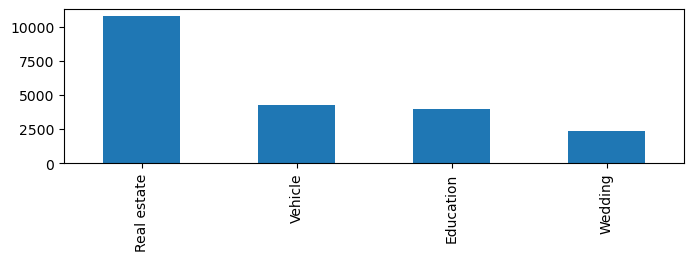

In [17]:
data['purpose_category'].value_counts().plot(kind="bar", figsize=(8, 2))

Let's remove explicit duplicates in all columns except **purpose**

In [18]:
filtered_data = data.drop_duplicates(subset=data.columns.difference(['purpose'])).reset_index(drop=True)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20997 entries, 0 to 20996
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          20997 non-null  int64  
 1   days_employed     20997 non-null  float64
 2   dob_years         20997 non-null  int64  
 3   education         20997 non-null  object 
 4   education_id      20997 non-null  int64  
 5   family_status     20997 non-null  object 
 6   family_status_id  20997 non-null  int64  
 7   gender            20997 non-null  object 
 8   income_type       20997 non-null  object 
 9   debt              20997 non-null  int64  
 10  total_income      20997 non-null  float64
 11  purpose           20997 non-null  object 
 12  purpose_category  20997 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


In [19]:
filter_rate = 1 - len(filtered_data) / len(data)
filter_rate

0.018923465096719938

Duplicate rows took up 1.9% of the observed data

At the request of the data owner, based on the ranges given by them below, let's create a **total_income_category** column in the dataframe with categories:

- 0-30000 - 'E';
- 30001-50000 - 'D';
- 50001-200000 - 'C';
- 200001-1000000 - 'B';
- 1000001 and above - 'A'.

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
filtered_data['total_income_category'] = filtered_data['total_income'].apply(categorize_income)

In [22]:
filtered_data.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
20717,0,2707.304145,60,высшее,0,женат / замужем,0,M,компаньон,0,482220.148794,покупка недвижимости,Real estate,B
17985,0,2530.104519,46,среднее,1,гражданский брак,1,F,компаньон,0,261937.407981,на покупку своего автомобиля,Vehicle,B
14685,2,1705.635634,31,высшее,0,женат / замужем,0,F,сотрудник,0,74780.420356,покупка жилья для семьи,Real estate,C
5381,2,564.237723,31,среднее,1,женат / замужем,0,F,сотрудник,1,112557.502286,недвижимость,Real estate,C
20466,0,4251.220458,39,среднее,1,Не женат / не замужем,4,M,компаньон,0,289959.013196,строительство собственной недвижимости,Real estate,B
19260,1,2923.608172,38,среднее,1,женат / замужем,0,F,сотрудник,1,165211.882128,сделка с подержанным автомобилем,Vehicle,C
18211,2,229.890507,30,среднее,1,в разводе,3,F,сотрудник,0,119834.370513,операции с коммерческой недвижимостью,Real estate,C
13127,0,5162.210556,49,среднее,1,вдовец / вдова,2,F,сотрудник,0,179149.236672,ремонт жилью,Real estate,C
16634,1,3193.976851,33,среднее,1,женат / замужем,0,F,компаньон,0,141944.618305,операции с недвижимостью,Real estate,C
15549,0,176.418747,48,среднее,1,женат / замужем,0,F,компаньон,0,158459.681020,операции с недвижимостью,Real estate,C


In [23]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20997 entries, 0 to 20996
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               20997 non-null  int64  
 1   days_employed          20997 non-null  float64
 2   dob_years              20997 non-null  int64  
 3   education              20997 non-null  object 
 4   education_id           20997 non-null  int64  
 5   family_status          20997 non-null  object 
 6   family_status_id       20997 non-null  int64  
 7   gender                 20997 non-null  object 
 8   income_type            20997 non-null  object 
 9   debt                   20997 non-null  int64  
 10  total_income           20997 non-null  float64
 11  purpose                20997 non-null  object 
 12  purpose_category       20997 non-null  object 
 13  total_income_category  20997 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.2+ 

### Section 2 conclusions

We prepared the initial data to analyze:
- filled gaps;
- processed abnormal values;
- removed explicit and implicit duplicates;
- added data categorization features for loan purpose and total_income.

# 3. Exploring the data and answering the data owner's questions

### List of questions:
- Is there a correlation between the number of children and loan repayment on time?
- Is there a correlation between marital status and loan repayment on time?
- Is there a correlation between income level and loan repayment on time?
- How do the different purposes of a loan affect its repayment on time?

First of all, let's see the correlation matrix among features

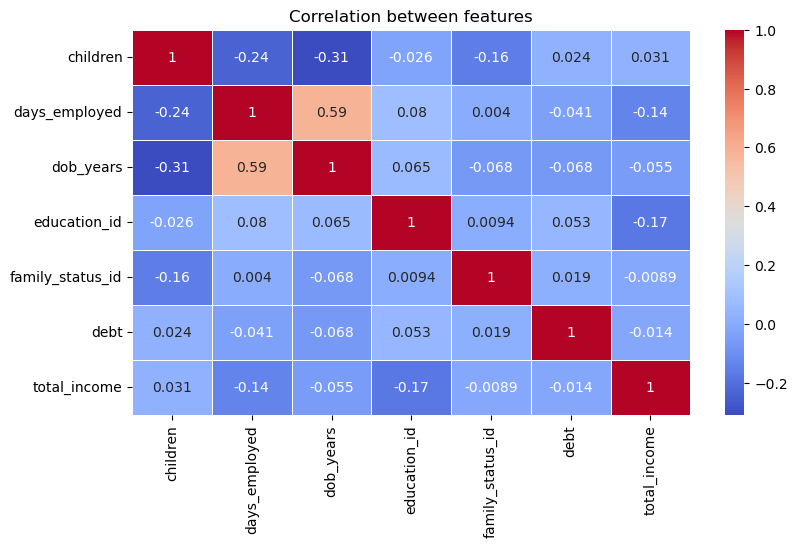

In [24]:
plt.figure(figsize=(9, 5))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation between features')
plt.show()

The correlation coefficients with the **debt** feature are close to 0, we need to look in more detail at all 4 pairs

Let's describe 3 auxiliary functions for building pivot table

In [25]:
def pivot_table_data(data, column_name):
    
    # add global benchmark
    print('Average percentage of debtors for all borrowers: {0:.1%}'.format(data['debt'].mean()))
    
    # gather 3 key metrics for given column and 'debt'
    table = pd.pivot_table(data, values='debt', index=[column_name], aggfunc={'debt': ['count', np.sum, np.mean]})
    
    # rename columns
    table = table.rename(columns={"count": "Total borrowers", "sum": "Total debtors", "mean": "Share of debtors, %"})

    table['Share of debtors, %'] = round(table['Share of debtors, %'] * 100, 1)
    
    # Sort the obtained table by the percent of debtors
    table = table.sort_values(by=['Share of debtors, %'], ascending=False)
    
    # Add column with info about share of borrowers in caterory 
    numerator = table['Total borrowers'].sum()
    
    table['Share of borrowers by categories, %'] = table['Total borrowers'] / numerator
    
    table['Share of borrowers by categories, %'] = round(table['Share of borrowers by categories, %'] * 100, 1)
    
    return table

In [26]:
def scatter_plot(table, column_name):
    
    # Reset indexes to extract info from target feature
    df = table.reset_index()
    
    plt.figure(figsize=(12, 3))
    
    # Create scatter plot chart
    plt.scatter(df[column_name], df['Share of debtors, %'], s=df['Total borrowers']/2, alpha=0.7,\
                label='Total borrowers')
    
    # Add axis names and the chart title
    plt.xlabel(column_name)
    plt.ylabel('Share of debtors, %')
    plt.title('Scatter Plot: ' + column_name + ' vs Share of debtors')
    
    # Set range on Oy to zoom-in
    plt.ylim(df['Share of debtors, %'].min() * 0.8, df['Share of debtors, %'].max() * 1.2)
    
    plt.legend(markerscale=0.3)
    
    # Add the coordinates of the center of the circles
    for i in range(len(df[column_name])):
        x = df.loc[i, column_name]
        y = df.loc[i, 'Share of debtors, %']
        plt.text(x, y, f'{y}%', ha='center', va='bottom', fontsize=8)
        
    plt.show()

In [27]:
def analysis_for_question(data, column_name):
    
    # Use the first subfunction
    table = pivot_table_data(data, column_name)
    
    display(table)
    
    # Use the second subfunction    
    scatter_plot(table, column_name)

### Question 1
- Is there a correlation between the number of children and loan repayment on time?

Average percentage of debtors for all borrowers: 8.2%


,Total borrowers,"Share of debtors, %",Total debtors,"Share of borrowers by categories, %"
children,,,,
4,40,10.0,4,0.2
2,2039,9.5,194,9.7
1,4751,9.3,444,22.6
3,329,8.2,27,1.6
0,13829,7.7,1061,65.9
5,9,0.0,0,0.0


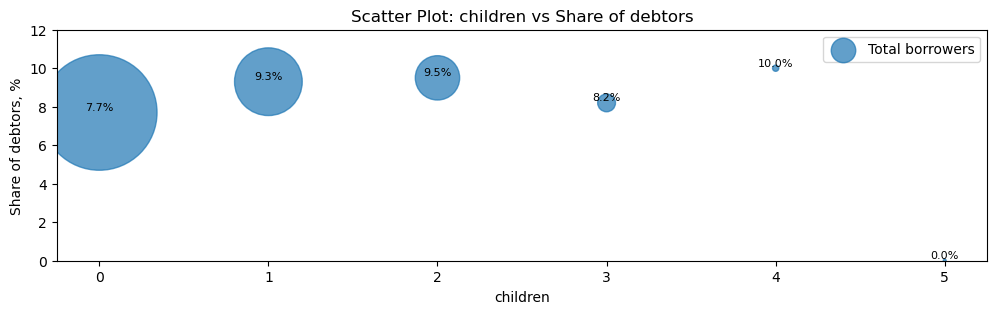

In [28]:
analysis_for_question(filtered_data, 'children')

### Answer to question 1
- The number of loan borrowers with 3 or more children is less than 2%. There is not enough data on these groups to draw conclusions on them.

- We can observe that borrowers with 1 or 2 children repay loans **less frequently than borrowers without children by 1.7 and 2 percentage points**. And 1.1 and 1.4 percentage points more often than the average of all borrowers.

### Question 2
- Is there a correlation between marital status and loan repayment on time?

Average percentage of debtors for all borrowers: 8.2%


,Total borrowers,"Share of debtors, %",Total debtors,"Share of borrowers by categories, %"
family_status,,,,
Не женат / не замужем,2770,9.9,273,13.2
гражданский брак,4107,9.4,385,19.6
женат / замужем,11998,7.7,925,57.1
в разводе,1187,7.1,84,5.7
вдовец / вдова,935,6.7,63,4.5


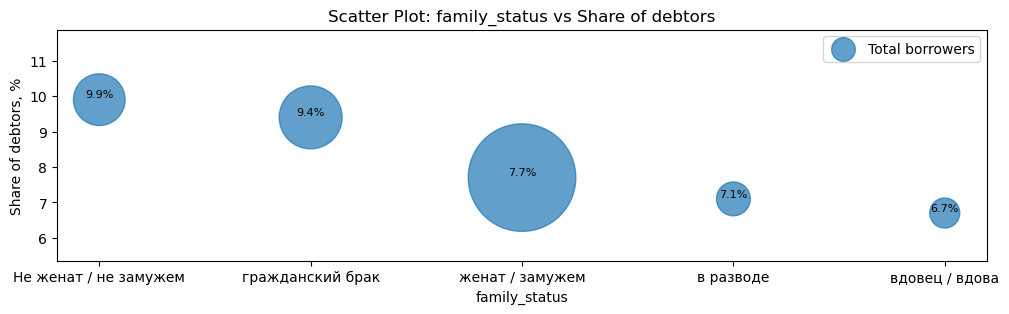

In [29]:
analysis_for_question(filtered_data, 'family_status')

### Answer to question 2
- The groups of borrowers **"Not married/not married"** and **"Civil marriage"** have default rates above the average for all borrowers by 1.7 and 1.2 percentage points, respectively, which **can be considered as significant outliers**.

- The other 3 groups have default rates below average. The group **"married"** by 0.5 percentage points, **"divorced"** by 1 p.p. and **"widower/widow"** by 1.5 p.p.

### Question 3
- Is there a correlation between income level and loan repayment on time?

Average percentage of debtors for all borrowers: 8.2%


,Total borrowers,"Share of debtors, %",Total debtors,"Share of borrowers by categories, %"
total_income_category,,,,
E,22,9.1,2,0.1
C,15587,8.7,1351,74.2
A,25,8.0,2,0.1
B,5014,7.1,354,23.9
D,349,6.0,21,1.7


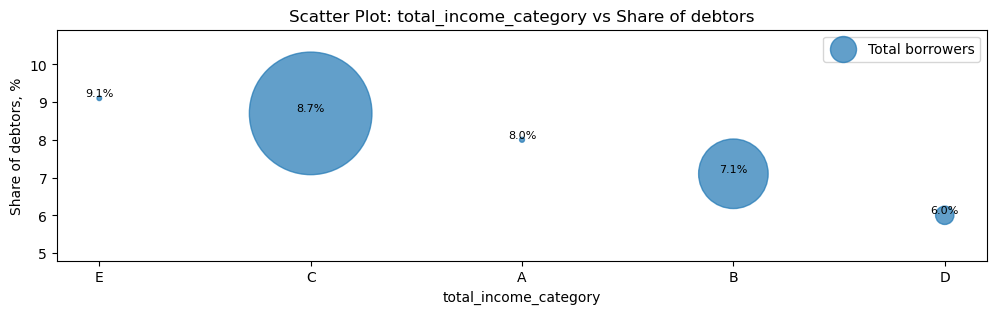

In [30]:
analysis_for_question(filtered_data, 'total_income_category')

### Answer to question 3
- The number of borrowers from categories "A", "D", "E" is less than 2%. There is not enough data on these groups to draw conclusions on them.

- We can see that borrowers from **category "B"** (income from 200,000 to 1000,000) **repay loans better than those from category "C"** (50,000 - 200,000). At the same time, category "B" is below average (7.1% < 8.2%) and "C" is already above average (8.7% > 8.2%)

### Question 4
- How do the different purposes of a loan affect its repayment on time?

Average percentage of debtors for all borrowers: 8.2%


,Total borrowers,"Share of debtors, %",Total debtors,"Share of borrowers by categories, %"
purpose_category,,,,
Education,3939,9.4,369,18.8
Vehicle,4245,9.4,399,20.2
Wedding,2295,8.0,183,10.9
Real estate,10518,7.4,779,50.1


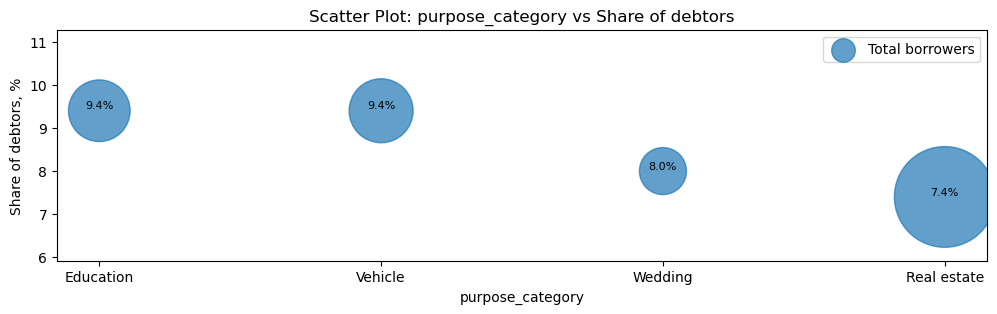

In [31]:
analysis_for_question(filtered_data, 'purpose_category')

### Answer to question 4
- We can see that the default repay loan rate for borrowers with the purposes **"Vehicle"** and **"Education"** is 1.2 percentage points higher than the average value (8.2%).

- Non-returns among the borrowers with the purpose **"Wedding"** are close to the average value.

- Non-repayment among borrowers with the purpose of "Real estate" is already noticeably lower than the average value by 0.8 p.p. Here we can add that the risk of losing house is a serious incentive for borrowers.

# 4. Project outcomes

- We filled in gaps in the initial data, processed abnormal values, removed explicit and implicit duplicates, added data categorization features for loan purpose and total income. A separate study is needed to determine the reasons of problems in raw data (that could have been caused by technical or human factors).

- Average loan repayment rate is 8.2% for all borrowers.

- The loan repayment rate is directly affected by the number of children, which is a potential risk for borrowers and banks.

- Family status is possibly correlated with the age and hence income level of the borrowers, so the risk of non-repayment is higher for the groups "Not married" and "Civil marriage".

- The income level directly affects the loan repayment rate.

- Borrowers with the purpose of "Real estate" are more disciplined than others, which may be associated with the risk of losing their living places.